In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#path = 'UNSW 15 Data/UNSW-NB15_{}.csv' 

In [3]:
print(path)

UNSW 15 Data/UNSW-NB15_{}.csv


In [6]:
train=pd.read_csv('UNSW 15 Data/train.csv')

In [7]:
train.head()

,dur,proto,service,state,rate,sttl,dttl,sjit,djit,swin,...,dpkts_log1p,sloss_log1p,dloss_log1p,stcpb_log1p,dtcpb_log1p,response_body_len_log1p,sinpkt_log1p,dinpkt_log1p,sload_log1p,dload_log1p
0,0.121478,tcp,-,FIN,74.087490,252,254,30.177547,11.830604,2.0,...,1.609438,0.000000,0.000000,20.248085,21.512874,0.0,3.230630,2.238047,9.558172,9.047394
1,0.649902,tcp,-,FIN,78.473370,62,252,61.426933,1387.778300,2.0,...,3.663562,1.098612,2.890372,21.072432,21.847347,0.0,3.930158,2.799283,9.035524,13.129482
2,1.623129,tcp,-,FIN,14.170161,62,252,17179.586000,11420.926000,2.0,...,2.833213,0.693147,1.945910,21.472865,21.809507,0.0,5.450504,4.641861,7.360913,11.017485
3,1.681642,tcp,ftp,FIN,13.677108,62,252,259.080170,4991.784700,2.0,...,2.564949,0.693147,1.386294,20.825027,20.769618,0.0,5.036150,4.513446,7.916143,8.119584
4,0.449454,tcp,-,FIN,33.373825,254,252,2415.837600,115.807000,2.0,...,1.945910,1.098612,0.693147,21.613680,21.404924,0.0,3.886712,4.339375,9.055147,8.291060


In [15]:
train.columns
print(len(train.columns))


40


In [17]:
len(train.index) # total number of row 

175341

In [18]:
test=pd.read_csv('UNSW 15 Data/test.csv')
test.head()

,dur,proto,service,state,rate,sttl,dttl,sjit,djit,swin,...,dpkts_log1p,sloss_log1p,dloss_log1p,stcpb_log1p,dtcpb_log1p,response_body_len_log1p,sinpkt_log1p,dinpkt_log1p,sload_log1p,dload_log1p
0,0.000011,udp,-,INT,90909.09,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010940,0.0,19.010485,0.0
1,0.000008,udp,-,INT,125000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007968,0.0,20.596570,0.0
2,0.000005,udp,-,INT,200000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004988,0.0,20.565910,0.0
3,0.000006,udp,-,INT,166666.66,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005982,0.0,20.212440,0.0
4,0.000010,udp,-,INT,100000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009950,0.0,20.561218,0.0


In [19]:
features=pd.read_csv('UNSW 15 Data/test.csv')
features.head()

,dur,proto,service,state,rate,sttl,dttl,sjit,djit,swin,...,dpkts_log1p,sloss_log1p,dloss_log1p,stcpb_log1p,dtcpb_log1p,response_body_len_log1p,sinpkt_log1p,dinpkt_log1p,sload_log1p,dload_log1p
0,0.000011,udp,-,INT,90909.09,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010940,0.0,19.010485,0.0
1,0.000008,udp,-,INT,125000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007968,0.0,20.596570,0.0
2,0.000005,udp,-,INT,200000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004988,0.0,20.565910,0.0
3,0.000006,udp,-,INT,166666.66,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005982,0.0,20.212440,0.0
4,0.000010,udp,-,INT,100000.00,254,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009950,0.0,20.561218,0.0


In [ ]:
# Now I will do clening, pre-prossing or any other  operation only in  training data not in in test data

In [20]:
train.isna().sum().sum() #no null values in train dataframe 

0

In [ ]:
#Explanatory data analysis

In [21]:
train.corr()

,dur,rate,sttl,dttl,sjit,djit,swin,dwin,synack,ackdat,...,dpkts_log1p,sloss_log1p,dloss_log1p,stcpb_log1p,dtcpb_log1p,response_body_len_log1p,sinpkt_log1p,dinpkt_log1p,sload_log1p,dload_log1p
dur,1.000000,-0.120966,0.012196,0.044159,0.144413,0.157443,0.022047,0.017529,0.051093,0.049332,...,0.062881,0.083208,0.047277,0.017404,0.017530,0.022447,0.372236,0.118008,-0.280962,-0.041936
rate,-0.120966,1.000000,0.407572,-0.414546,-0.063370,-0.085802,-0.515673,-0.518108,-0.279271,-0.290051,...,-0.511007,-0.436142,-0.386323,-0.517052,-0.517094,-0.143941,-0.441199,-0.430076,0.618953,-0.550640
sttl,0.012196,0.407572,1.000000,-0.032823,0.022676,-0.123435,-0.416832,-0.424313,0.042590,0.032293,...,-0.634833,-0.463541,-0.604301,-0.423683,-0.423537,-0.292904,-0.209413,-0.108260,0.447765,-0.752161
dttl,0.044159,-0.414546,-0.032823,1.000000,0.147401,0.101262,0.746231,0.754004,0.747000,0.781261,...,0.520984,0.529143,0.331195,0.752086,0.752643,0.196028,0.642740,0.876178,-0.654493,0.445299
sjit,0.144413,-0.063370,0.022676,0.147401,1.000000,0.466849,0.118504,0.119347,0.132369,0.128521,...,0.073701,0.071072,0.017479,0.118835,0.119369,0.024643,0.238754,0.295820,-0.131059,0.039624
djit,0.157443,-0.085802,-0.123435,0.101262,0.466849,1.000000,0.160651,0.162257,0.077343,0.080287,...,0.164194,0.122501,0.153626,0.161730,0.161707,0.222084,0.227875,0.272050,-0.175050,0.103962
swin,0.022047,-0.515673,-0.416832,0.746231,0.118504,0.160651,1.000000,0.990107,0.528951,0.549409,...,0.865843,0.840098,0.741353,0.988223,0.988163,0.273123,0.561214,0.780574,-0.666850,0.760181
dwin,0.017529,-0.518108,-0.424313,0.754004,0.119347,0.162257,0.990107,1.000000,0.534306,0.554831,...,0.875419,0.836669,0.748686,0.997845,0.997925,0.275823,0.555179,0.788607,-0.663480,0.770356
synack,0.051093,-0.279271,0.042590,0.747000,0.132369,0.077343,0.528951,0.534306,1.000000,0.788623,...,0.317682,0.354578,0.178641,0.533205,0.533305,0.097966,0.522069,0.653983,-0.484837,0.239506
ackdat,0.049332,-0.290051,0.032293,0.781261,0.128521,0.080287,0.549409,0.554831,0.788623,1.000000,...,0.337638,0.371395,0.198925,0.553486,0.553828,0.119929,0.534245,0.676663,-0.500017,0.256586


In [24]:
 # sns.heatmap(train) # not support as some variable are str or float

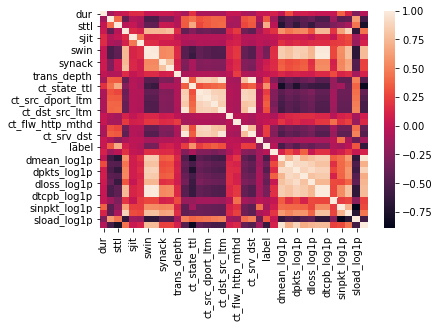

In [25]:
sns.heatmap(train.corr())

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dur                      175341 non-null  float64
 1   proto                    175341 non-null  object 
 2   service                  175341 non-null  object 
 3   state                    175341 non-null  object 
 4   rate                     175341 non-null  float64
 5   sttl                     175341 non-null  int64  
 6   dttl                     175341 non-null  int64  
 7   sjit                     175341 non-null  float64
 8   djit                     175341 non-null  float64
 9   swin                     175341 non-null  float64
 10  dwin                     175341 non-null  float64
 11  synack                   175341 non-null  float64
 12  ackdat                   175341 non-null  float64
 13  trans_depth              175341 non-null  int64  
 14  ct_s

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dur                      82332 non-null  float64
 1   proto                    82332 non-null  object 
 2   service                  82332 non-null  object 
 3   state                    82332 non-null  object 
 4   rate                     82332 non-null  float64
 5   sttl                     82332 non-null  int64  
 6   dttl                     82332 non-null  int64  
 7   sjit                     82332 non-null  float64
 8   djit                     82332 non-null  float64
 9   swin                     82332 non-null  float64
 10  dwin                     82332 non-null  float64
 11  synack                   82332 non-null  float64
 12  ackdat                   82332 non-null  float64
 13  trans_depth              82332 non-null  int64  
 14  ct_srv_src            

In [34]:
nrow(train[train['label']==1])

NameError: name 'nrow' is not defined

In [35]:
train['state'].nunique()

6

In [36]:
train['state'].size

175341

In [37]:
train['state'].count()

175341

In [42]:
train.state.unique()

array(['FIN', 'INT', 'CON', 'others', 'REQ', 'RST'], dtype=object)

In [43]:
train.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [45]:
train.label.unique()

array([0, 1], dtype=int64)

In [46]:
sns.plot'attack_cat')

NameError: name 'col_countplot' is not defined